---

# CSCI 3202, Spring 2022
# Homework 4
# Due: Friday April 1, 2022 at 6:00 PM

<br> 

### Your name: Zhanchao Yang

<br> 

---

Some useful packages and libraries:




In [136]:
from scipy import stats
import unittest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#library 
from scipy import stats
from math import floor, isclose
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Unit tests

In [137]:
class Tests_Problem1(unittest.TestCase):
    def setUp(self):
        self.p1 = BayesNode('p1', '', [T,F], 0.3)
        self.p2 = BayesNode('p2', '', [T,F], 0.6)
        self.c  = BayesNode('c', ['p1', 'p2'], [T,F], {(T,T):0.1, (T,F):0.2, (F,T):0.3, (F,F):0.4})
    def test_onenode(self):
        self.assertEqual(P(self.p1, T), 0.3)
    def test_twonode(self):
        self.assertEqual(P(self.c, F, {'p1':T, 'p2':F}), 0.8)

---

## Problem 1: (100 Points) Bayesian network to model heart disease

The following Bayesian network is based loosely on a study that examined heart disease risk factors in 167 elderly individuals in South Carolina. Note that this figure uses Y and N to represent Yes and No, whereas in class we used the equivalent T and F to represent True and False Boolean values.

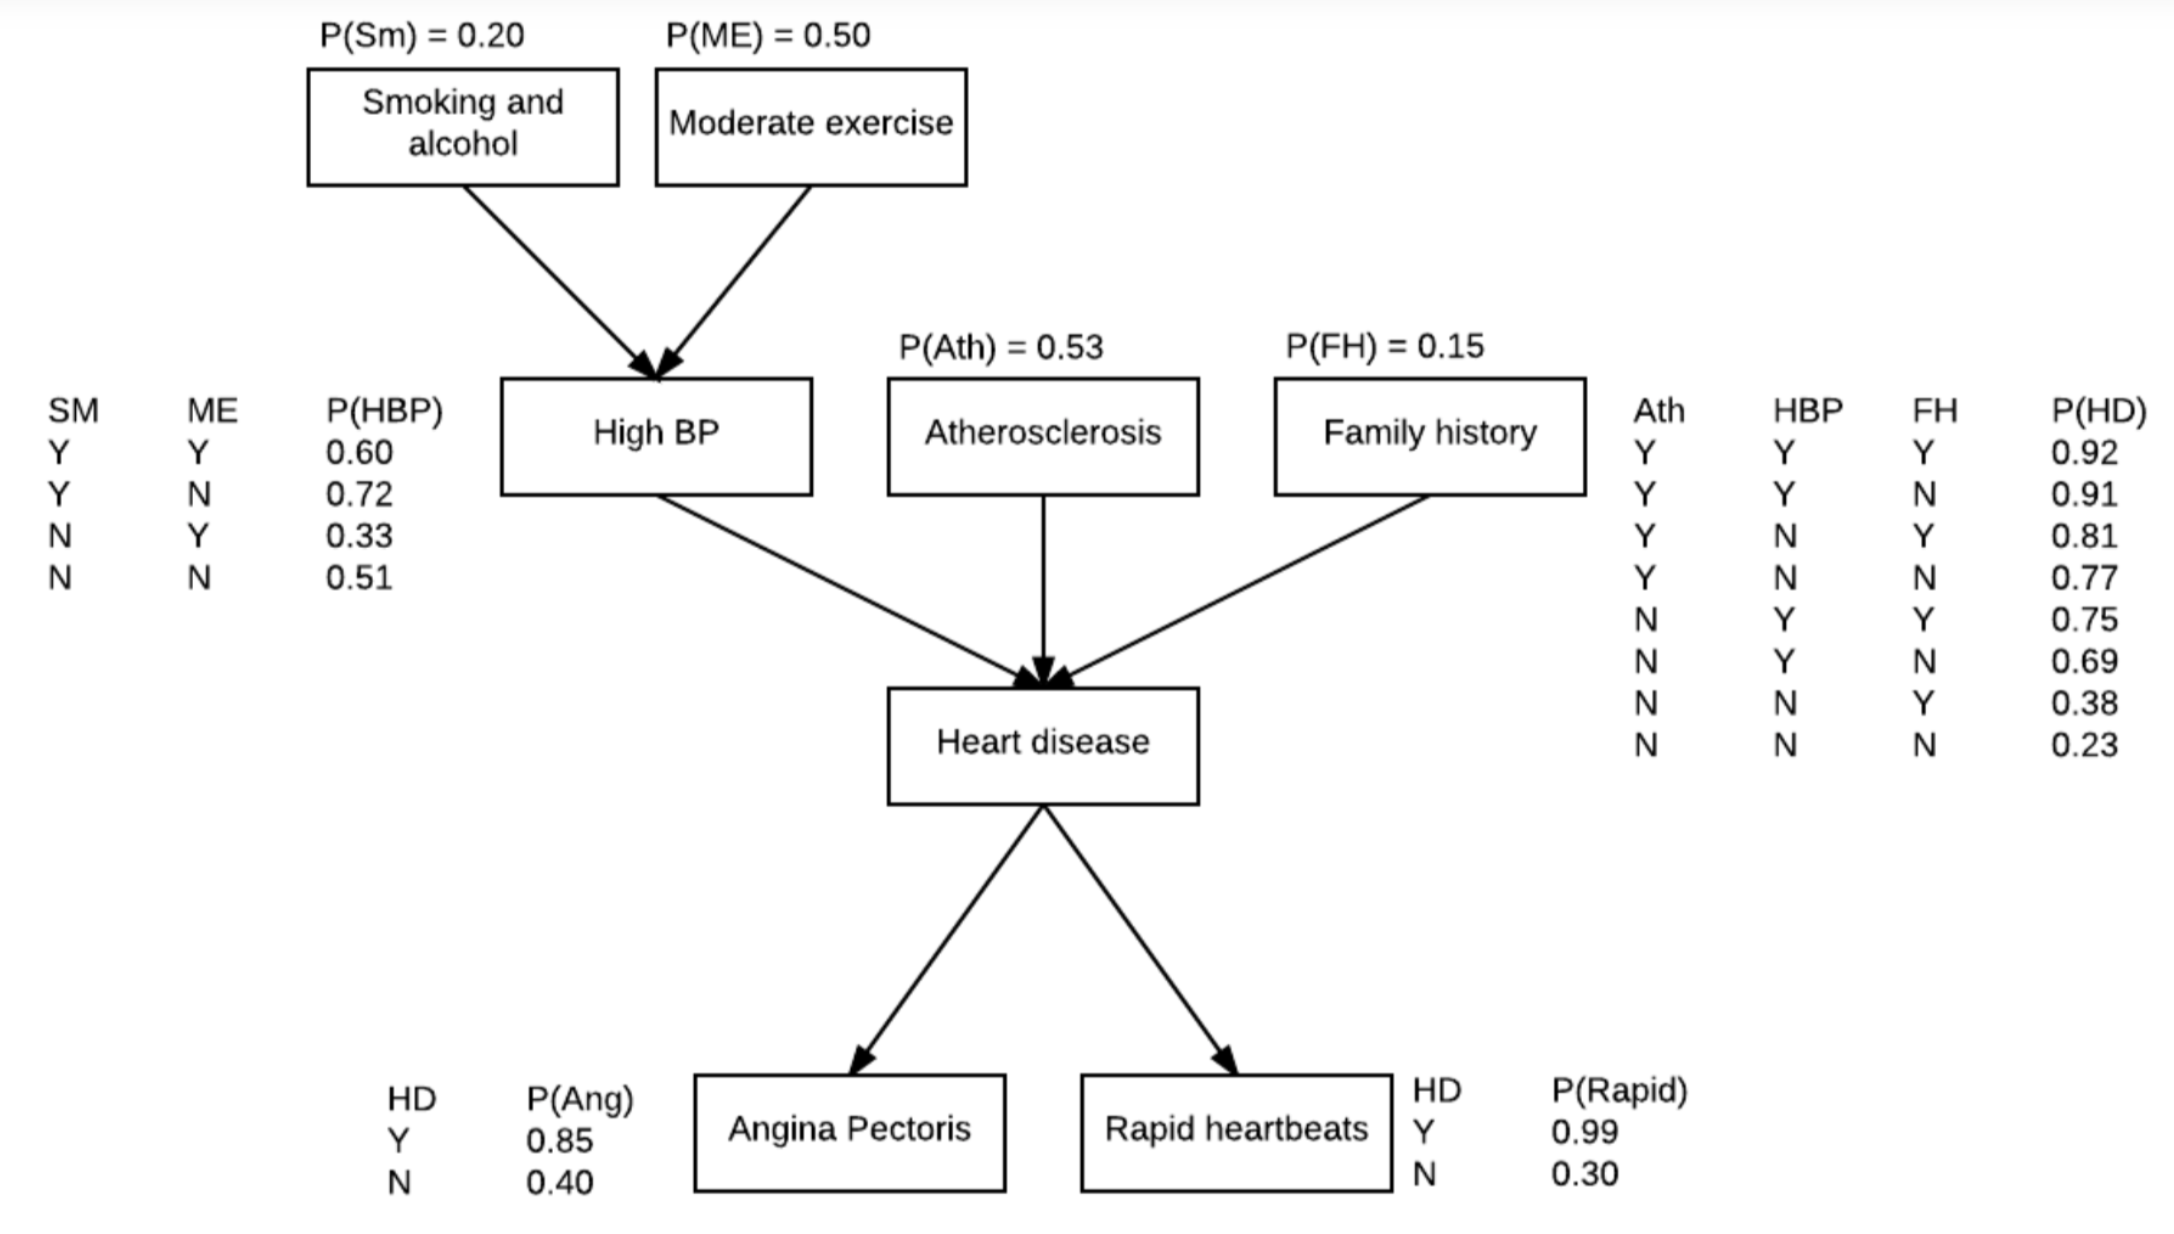

<a id='p1a'></a>

### (1a) 

Create a `BayesNet` object to model this.  Below are the codes for the (conditional) probability `P` function and `BayesNode` class as well, that we used in class on Friday (11 March) to represent the variable nodes and calculate probabilities. You can code this however you want, subject to the following constraints:
1. the nodes are represented using the `BayesNode` class and can work with the `P` function for probabilities,
1. your `BayesNet` structure keeps track of which nodes are in the Bayes net, as well as
1. which nodes are the parents/children of which other nodes.

Some *suggested* skeleton codes for a class structure are given. The suggestions for methods to implement are in view of the fact that we will need to calculate some probabilities, which is going to require us to `find_node`s and `find_values` that nodes can take on.

In [138]:
## For the sake of brevity...
## create BayesNet by looking the lecture 25 notebook of the class, copy it and make some change according problem
# code are from lecture 25 notebook of the class on canvas
T, F = True, False

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

## Also from class:
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))    

    
##===============================================##
## Suggested skeleton codes for a BayesNet class ##
##===============================================##

class BayesNet:
    '''Bayesian network containing only boolean-variable nodes.'''

    def __init__(self, nodes):
        '''Initialize the Bayes net by adding each of the nodes,
        which should be a list BayesNode class objects ordered
        from parents to children (`top` to `bottom`, from causes
        to effects)'''
        
        # your code goes here...
        self.nodes = []
        self.variables = []
        #here we have nodes instead
        for node in nodes:
            self.add(*node)        

  #change 2 var to 5 var func              
    def add(self, name, parents, values, cpt):
    #def add(self, node):
        '''Add a new BayesNode to the BayesNet. The parents should all
        already be in the net, and the variable itself should not be'''
        node = BayesNode(name=name, parents=parents, values=values, cpt=cpt)
        
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        
        # your code goes here...
        self.nodes.append(node)
        self.variables.append(node.variable)
        for parent in node.parents:
            self.find_node(parent).children.append(node)        
            
    def find_node(self, var):
        '''Find and return the BayesNode in the net with name `var`'''
        
        # your code goes here...
        for n in self.nodes:
            if n.variable == var:
                return n
        raise Exception("No such variable: {}".format(var))        
        
    def find_values(self, var):
        '''Return the set of possible values for variable `var`'''
        
        # your code goes here...
        varnode = self.find_node(var)
        return varnode.values        
    
    def __repr__(self):
        return 'BayesNet({})'.format(self.nodes)

#### Unit tests

In [139]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem1("test_onenode"))
tests_to_run.addTest(Tests_Problem1("test_twonode"))
unittest.TextTestRunner().run(tests_to_run)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>


### (1b)

Craft a function `get_prob(X, e, bn)` to return the **normalized** probability distribution of variable `X` in Bayes net `bn`, given the evidence `e`.  That is, return $P(X \mid e)$. The arguments are:
* `X` is some representation of the variable you are querying the probability distribution of. Either a string (the variable name from the `BayesNode` or a `BayesNode` object itself are good options.
* `e` is some representation of the evidence your probability is conditioned on. When given an empty argument (or `None`) for `e`, `get_prob` should return the marginal distribution $P(X)$.
* `bn` is your `BayesNet` object.

You may do this using the `enumeration` algorithm from class (pseudocode is in the book, code example is in the notebook from March 11), or by brute force (i.e., use a few `for` loops). Either way, you should be using your `BayesNet` object to keep track of all the nodes and relationships between nodes so your `get_prob` function knows these things.

In [140]:
# Your code here.
# code from lecture25 notebook, we need create a class PDF_discrete
#
class PDF_discrete:
    '''Define a discrete probability distribution function.'''

    def __init__(self, varname='?', freqs=None):
        '''Create a dictionary of values - frequency pairs,
        then normalize the distribution to sum to 1.'''
        self.prob = {}
        self.varname = varname
        self.values = []
        if freqs:
            for (v, p) in freqs.items():
                self[v] = p
        self.normalize()

    def __getitem__(self, value):
        '''Given a value, return P[value]'''
        try:
            return self.prob[value]
        except KeyError:
            return 0

    def __setitem__(self, value, p):
        '''Set P[value] = p, input argument if '''
        if value not in self.values:
            self.values.append(value)
        self.prob[value] = p

    def normalize(self):
        '''Normalize the probability distribution and return it.
        If the sum of PDF values is 0, then return a 0'''
        total = sum(self.prob.values())
        if not isclose(total, 1.0):
            for value in self.prob:
                self.prob[value] /= total
        return self
    
def extend(s, var, val):
    """Copy the substitution s and extend it by setting var to val; return copy."""
    s2 = s.copy()
    s2[var] = val
    return s2

In [141]:
# our get_prob function is same as classs enumeration_ask function
def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''
    Queue = PDF_discrete(X)
    for xi in bn.find_values(X):
        Queue[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
    return Queue.normalize()

def enumerate_all(variables, e, bn):
    '''Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables.'''
    if not variables:
        return 1.0
    Y, rest = variables[0], variables[1:]
    Ynode = bn.find_node(Y)
    if Y in e:
        # Y in evidence, so we know its value and just multiply
        
        return P(Ynode, e[Y], e) * enumerate_all(rest, e, bn)
    else:
        # Y not in evidence so we have to sum (Law of Total Prob.)    
        return sum(P(Ynode, y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                   for y in bn.find_values(Y))

In [142]:
# Your code here. our heart disease model with probalility
heart_disease_model = BayesNet([
    ('smoke_alcohol', '', [T,F], 0.2),
    ('moderate_exercise', '', [T,F], 0.5),
    ('High_BP', ['smoke_alcohol', 'moderate_exercise'], [T,F], {(T, T): 0.60, (T, F): 0.72, (F, T): 0.33, (F, F): 0.51}),
    ('atherosclerosis', '', [T,F], 0.53),
    ('family_history', '', [T,F], 0.15),
    ('heart_disease', ['High_BP','atherosclerosis', 'family_history'], [T,F], {(T, T,T): 0.92, (T, T,F): 0.91, (F,T, T): 0.81, (F,T, F): 0.77,
                                                                              (T,F, T): 0.75, (T, F,F): 0.69, (F,F, T): 0.38, (F,F, F): 0.23}),

    ('angina_pectoris', 'heart_disease', [T,F], {T: 0.85, F: 0.40}),
    ('rapid_heartbeats', 'heart_disease', [T,F], {T: 0.99, F: 0.30})
])

Use your `get_prob` function to calculate the following probabilities. Print them to the screen and compare to the original Bayes net figure given to make sure the output passes these "unit tests".

1. The marginal probability of `Family History` is $P(FH=T)=0.15$
2. The probability of *not* experiencing `Angina Pectoris`, given `Heart Disease` is observed, is $P(Ang=F \mid HD=T)=1-0.85=0.15$
3. The probability of `High Blood Pressure`, given a person does `Smoke and/or use Alcohol` but does not get `Moderate Exercise`, is $P(HBP=T \mid Sm=T, ME=F)=0.72$

In [143]:
## Your code here. 
#the format (X,e,bn) is similar the format of class notebook
p1 = get_prob(X='family_history', e={}, bn=heart_disease_model)
p2 = get_prob(X='angina_pectoris', e={'heart_disease':T}, bn=heart_disease_model)
p3 = get_prob(X='High_BP', e={'smoke_alcohol' : T, 'moderate_exercise' : F}, bn=heart_disease_model)


#since p1.prob give two thing,so we can choose index 0 as false value,index 1 as true value,
#print(p1.prob)


p1_new="{:.2f}".format(p1.prob[1])
p2_new="{:.2f}".format(p2.prob[0])
p3_new="{:.2f}".format(p3.prob[1])
print('The marginal probability of Family History is',p1_new, ';\n','The probability of not experiencing Angina Pectoris'
      , p2_new,';\n','The probability of High Blood Pressure',p3_new)


if ( str(p3_new)=='0.72'and str(p2_new)=='0.15'and str(p1_new)=='0.15'): print('pass unit tests')


The marginal probability of Family History is 0.15 ;
 The probability of not experiencing Angina Pectoris 0.15 ;
 The probability of High Blood Pressure 0.72
pass unit tests



### (1c)

Calculate the probability of observing someone with `High Blood Pressure`, $P(HBP=T)$, *by hand*, showing all work in Markdown/LateX below.

since HBP depend on both 'smoke_alcohol', 'moderate_exercise', so there will be $2^2$ compoments. 

P(HBP=T)=P(HBP |S,M)P(S)P(M)+P(HBP |-S,M)P(-S)P(M)+P(HBP |S,-M)P(S)P(-M)+P(HBP |-S,-M)P(-S)P(-M)

= $0.6*0.2*0.5+0.33*0.8*0.5+0.72*0.2*0.5+0.51*0.8*0.5$

=$\textbf{0.468}$
      
        

**Verify** your calculation using your `get_prob` function.

In [144]:
# Your code here. set precsion with 3 digits to compare
p4=get_prob(X='High_BP', e={}, bn=heart_disease_model)
print('probality is', (p4.prob[1]))
print('probality with approx 3 digits is', "{:.3f}".format(p4.prob[1]))

probality is 0.4680000000000001
probality with approx 3 digits is 0.468


So two value are the same, it will get 0.468.


### (1d)

Now calculate the following probabilities using your `get_prob` function.

[i] The probability of an arbitrary individual having `Heart Disease`, $P(HD=T)$

In [145]:
# Your code here.
p5=get_prob(X='heart_disease', e={}, bn=heart_disease_model)
#print(p5.prob)

print('The probability of an arbitrary individual having Heart Disease is',p5.prob[1])

The probability of an arbitrary individual having Heart Disease is 0.6617765600000001


[ii] The probability that an individual does *not* have `Heart Disease`, given that `Rapid Heartbeat` was observed, $P(HD=F \mid Rapid=T)$

In [146]:
# Your code here.
p6=get_prob(X='heart_disease', e={'rapid_heartbeats':T}, bn=heart_disease_model)
#print(p6.prob)

print('The probability that an individual does not have Heart Disease is',p6.prob[0])

The probability that an individual does not have Heart Disease is 0.13410463727200098


[iii] The probability of an individual having `High Blood Pressure` if they have `Heart Disease` and a `Family History`, $P(HBP=T \mid HD=T, FH=T)$

In [147]:
# Your code here.
p7=get_prob(X='High_BP', e={'heart_disease':T, 'family_history':T}, bn=heart_disease_model)
#print(p7.prob)

print('The probability of an individual having High Blood Pressure is',p7.prob[1])

The probability of an individual having High Blood Pressure is 0.5486791513343575


[iv] The probability that an individual is a `Smoker/Alcohol User` if they have `Heart Disease`, $P(Sm=T \mid HD=T)$

In [148]:
# Your code here.
p8=get_prob(X='smoke_alcohol', e={'heart_disease':T}, bn=heart_disease_model)
#print(p8.prob)

print('The probability that an individual is a Smoker/Alcohol User is',p8.prob[1])

The probability that an individual is a Smoker/Alcohol User is 0.2163440784303391


[v] How would you expect the probability in [iv] to change if you also know the individual has `High Blood Pressure`?  Verify your hypothesis by calculating the relevant probability.

Answer：If the individual has High Blood Pressure, I think it may be caused by smoking and drinking, so the person may be smoking and drinking, so that the probability of this person smoking and drinking increases. Use get_prob turnout it is incresing.

In [149]:
# Your code here. add high BP into e
p9=get_prob(X='smoke_alcohol', e={'heart_disease':T,'High_BP':T}, bn=heart_disease_model)
#print(p9.prob)

print('The probability that an individual is a Smoker/Alcohol User is',p9.prob[1])

The probability that an individual is a Smoker/Alcohol User is 0.28205128205128205


[vi] How would you expect the probability in [v] to change if you also know that the individual does *not* get `Moderate Exercise` (in addition to having `Heart Disease` and `High Blood Pressure`)?  Explain your answer using concepts from class.  Verify your answer by calculating the relevant probability.

Answer:<!---I think the probability that this person is smoking and drinking increases, if a person does not exercise, then this person may have similar bad habits.-->I think the probability of this person smoking and drinking may be about the same, because a person who smokes and drinks may exercise or may not, and the person who does not exercise for each determinant is smoking and drinking. It trunout the probality is there will be a bit of a dip, maybe the smokers and drinkers notice their bad habits and start exercising.

In [150]:
# Your code here.
p10=get_prob(X='smoke_alcohol', e={'heart_disease':T,'High_BP':T,'moderate_exercise':F}, bn=heart_disease_model)
print(p10.prob)

print('The probability that an individual is a Smoker/Alcohol User is',p10.prob[1])

{True: 0.2608695652173913, False: 0.7391304347826088}
The probability that an individual is a Smoker/Alcohol User is 0.2608695652173913


---


<img src="https://inhabitat.com/wp-content/blogs.dir/1/files/2014/02/norman-bike-riding-dog.png" style="width: 350px;"/>

## Problem 2:  (Extra Credit) Bayesian network to model decision-making

Let's consider using a Bayesian network to model our decision about whether or not to ride our bike to work today.  This decision depends heavily on the weather, so let's focus on that.

In class, we focused on Boolean variables.  For example, we might base our biking decision on whether or not it is raining.  But in reality, it probably matters *how hard* it is raining.  So suppose we break the variable `Rain` up into three discrete bins: `none`, `light` and `heavy`.

The temperature also factors into our decision.  There is definitely a sweet spot, where temperatures are neither too warm nor too cold, so it is very likely we would enjoy riding our bike.  So we can model the variable `Temperature` also using three discrete bins: `cold`, `moderate` and `warm`.

So a Bayesian network to model our decision for whether or not to bike to work could be as follows, where the first letter of each discrete bin is used to denote that variable value (i.e., `R=h` stands for heavy rain conditions).

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/bayesnet_biking2.png" style="width: 650px;"/>


### (2a)

Modify the `P` probability function to be able to handle these ternary parent nodes.

In [151]:
# Your code here. There are three parents 

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    if len(var.parents)==0:
        # special case 
        #if no parent, return value
        #return var.cpt.get(value)
        for x,y in var.cpt.items():
            for i,j in y.items():
                if i==value:
                    return j
        
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

Set up `BayesNode` objects for each of `Rain`, `Temp` and `Bike`, and create a `BayesNet` object to model the Bayesian network for this decision.  Again, you can use whatever structure you wish for your `BayesNet`, but please use the `BayesNode` class.  You may need to make minor modifications to the `BayesNode` class (e.g., changing/adding attributes), although none are strictly necessary.

In [152]:
# Your code here. #[1,0] is [true and false]
#setup the 6 node object, n,l,h,c,m,w are correpond none,light,heavy,cold, moderate and warm.
n='n'
l='l'
h='h'
c='c'
m='m'
w='w'

#setup the model
decision_making_model= BayesNet([
   ('rain', '', ['n','l','h'], {'n': 0.8,'l': 0.15,'h':0.05}),
    ('temp', '', ['c','m','w'], {'c': 0.3,'m': 0.6,'w':0.1}),   
    ('bike', ['rain', 'temp'], [1,0], {('n', 'c'): 0.7, ('n', 'm'): 0.99, ('n', 'w'): 0.9, ('l', 'c'): 0.4,
                                      ('l', 'm'): 0.6, ('l', 'w'): 0.5, ('h', 'c'): 0.2, ('h', 'm'): 0.4,('h', 'w'): 0.3}),
])


**Verify** that your modified probability function `P` is working by checking the following "unit tests". Print the output to screen and compare to what you expect from the figure above.

1. The marginal probability of no rain is $P(Rain=n)=0.8$
1. The marginal probability of light rain is $P(Rain=l)=0.15$
1. The marginal probability of heavy rain is $P(Rain=h)=0.05$
1. The probability of biking given that it is raining heavily and the temperature is cold, is $P(Bike=T \mid Rain=h, Temp=c)=0.2$

In [153]:
# Your code here.
#using p dunction and we need apply find node
node_rain=decision_making_model.find_node('rain')

#then using new P function to find probalitlity, input is node, var,and model
p1=P(node_rain,'n', decision_making_model)
print('The marginal probability of no rain is',p1)

p2=P(node_rain,'l', decision_making_model)
print('The marginal probability of light rain is',p2)
p3=P(node_rain,'h', decision_making_model)
print('The marginal probability of heavy rain is',p3)
#it has two condion, use get_prob instead of P,true case is correspond index 1

p4=get_prob(X='bike', e={'rain':'h','temp':'c'}, bn=decision_making_model)
print('The probability of biking given that it is raining heavily and the temperature is cold, is',p4.prob[1])

The marginal probability of no rain is 0.8
The marginal probability of light rain is 0.15
The marginal probability of heavy rain is 0.05
The probability of biking given that it is raining heavily and the temperature is cold, is 0.2



### (2b)

Make any necessary modifications to your `get_prob` function from Problem 1, so that you can use it to calculate marginal probabilities and conditional probabilities for this problem. It is possible that your function does not require any modifications.

In [154]:
# Your code here.

#my get_prob does not require any modifications

Use `get_prob` to calculate $P(Bike)$, the probability distribution for whether or not you will ride your bike on any given day.

In [155]:
# Your code here.
p5=get_prob(X='bike', e={}, bn=decision_making_model)
print('The probability whether or not you will ride your bike on any given day is',p5.prob[1])

The probability whether or not you will ride your bike on any given day is 0.8111999999999999


Use `get_prob` to calculate the probability that you will ride your bike, given that it is lightly raining.

In [156]:
# Your code here.
p6=get_prob(X='bike', e={'rain':'l'}, bn=decision_making_model)
print('given that it is lightly raining, the probability that you will ride your bike is',p6.prob[1])

given that it is lightly raining, the probability that you will ride your bike is 0.53



### (2c)

We are trapped indoors because some jerk gave us a ton of Intro to Artificial Intelligence homework to do.  Suppose we look out the window and see people biking. They sure do look like they're having fun! *Given* this information, we can actually make inferences regarding the temperature outside!  What is the probability distribution for temperature, given that we observe people biking?

First, compute this using your `get_prob` function.

In [157]:
# Your code here.
p7=get_prob(X='temp', e={'bike':'T'}, bn=decision_making_model)

#print(p7.prob)
#using the index c,m,h (key) to get each probalility
print('The probality of cold temp is',p7.prob['c'],'\n'
 'The probality of moderate temp is',p7.prob['m'],'\n'
 'The probality of warm temp is',p7.prob['w'])

The probality of cold temp is 0.2329881656804734 
The probality of moderate temp is 0.6671597633136096 
The probality of warm temp is 0.09985207100591718



### (2d)

Confirm your answer to **2c** by hand, showing *all* relevant work below in a LateX/Markdown cell.

since HBP depend on both 'smoke_alcohol', 'moderate_exercise', so there will be $2^2$ compoments. 

 we will use Bayesian formula,ie, P(temp=c|bike)=$\frac{P(bike|temp=c)P(temp)}{P(bike)}$

$\textbf{Information we need:}$

we have p(bike)=0.8112 above, we can verify by hand add up $3^3$ compoments Which p(bike)=$0.7*0.8*0.3+0.99*0.8*0.6+
0.9*0.8*0.1+0.4*0.15*0.3+0.6*0.15*0.6+0.5*0.15*0.1+0.2*0.05*0.3+0.4*0.05*0.6+0.3*0.05*0.1$=$\textbf{0.8112}$

where P(bike|temp=c) has $3^1$ compoments because rain has 3 case Which=P(bike |T=c,R=n)P(T=c)P(R=n)+P(bike |T=c,R=l)P(T=c)P(R=l)+P(bike |T=c,R=h)P(T=c)P(R=h)
= $0.7*0.8*0.3+0.4*0.15*0.3+0.2*0.05*0.3=\textbf{0.189}$

where P(bike|temp=m)=P(bike |T=m,R=n)P(T=m)P(R=n)+P(bike |T=m,R=l)P(T=m)P(R=l)+P(bike |T=m,R=h)P(T=m)P(R=h)
= $0.99*0.8*0.6+0.6*0.15*0.6+0.4*0.05*0.6=\textbf{0.5412}$

where P(bike|temp=w)=P(bike |T=w,R=n)P(T=w)P(R=n)+P(bike |T=w,R=l)P(T=w)P(R=l)+P(bike |T=w,R=h)P(T=w)P(R=h)
= $0.9*0.8*0.1+0.5*0.15*0.1+0.3*0.05*0.1=\textbf{0.081}$

$\textbf{Therefore, solution is}$

1.P(temp=c|bike)=$\frac{0.189}{0.8112}=\textbf{0.23298816568}$

2.P(temp=m|bike)=$\frac{0.5412}{0.8112}=\textbf{0.66715976331}$

3.P(temp=w|bike)=$\frac{0.081}{0.8112}=\textbf{0.099852071}$ 


### (2e)

Finally, confirm your confirmation of the probability distribution for `Temp` by using approximate Bayesian computation and 10,000 samples.  That is, use the **prior sampling** and **"rejection sampling"** techniques from class to estimate the probabilities associated with each possible value for `Temp`, given that there are people biking outside.

In [158]:
# Your code here.
#use np.random.choice to approx 10000 sample,source https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
# we put in 1-D array,size,prob

# source to plot dataframe https://datatofish.com/plot-dataframe-pandas/

                               
a=['c','m','w']
p=[p7.prob['c'],p7.prob['m'],p7.prob['w']]
# print(p)
#x='Temp'

s=np.random.uniform(0,1,10000)
# print(s)

lst1=[]
lst2=[]
lst3=[]
# for i in range(len(s)):
#     if s[i]<p7.prob['c']:
#         lst1.append(0)
#     if s[i]<p7.prob['m']:
#         lst2.append(0)
#     if s[i]<p7.prob['w']:
#         lst3.append(0)        
# print(lst1.count(0)/10000) 
# print(lst2.count(0)/10000)
# print(lst3.count(0)/10000)

for i in range(10000):
    s=np.random.uniform()
    if s < p7.prob['c']:
        lst1.append(0)
    if s < p7.prob['m']:
        lst2.append(0)
    if s < p7.prob['w']:
        lst3.append(0)
print('with prior sampling, The probability of cold temp is',lst1.count(0)/10000) 
print('with prior sampling, The probability of moderate temp is',lst2.count(0)/10000) 
print('with prior sampling, The probability of warm temp is',lst3.count(0)/10000) 


print('with rejection sampling, The probability of cold temp is',lst1.count(0)/len(lst1)) 
print('with rejection sampling, The probability of modreate temp is',lst2.count(0)/len(lst2)) 
print('with rejection sampling, The probability of warm temp is',lst3.count(0)/len(lst3)) 






with prior sampling, The probability of cold temp is 0.2276
with prior sampling, The probability of moderate temp is 0.6641
with prior sampling, The probability of warm temp is 0.0958
with rejection sampling, The probability of cold temp is 1.0
with rejection sampling, The probability of modreate temp is 1.0
with rejection sampling, The probability of warm temp is 1.0


Note that the prior sampling will approx match my answer to 2d.

As a "Unit Test", check what the probability of riding your bike is, given no other information.  Make sure this approximately matches your answer to **2b**.

In [159]:
lst1=[]
# Your code here.
for i in range(10000):
    s=np.random.uniform()
    if s < p5.prob[1]:
        lst1.append(0)
    else:
        lst1.append(1)
print('The probability of riding your bike is True',lst1.count(0)/10000) 
print('The probability of riding your bike is False',lst1.count(1)/len(lst1)) 

The probability of riding your bike is True 0.8102
The probability of riding your bike is False 0.1898


Note the The probability of riding your bike is True is approx 0.81, which match my answer to 2b(0.8112)